In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import os

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
os.getcwd()

'C:\\Users\\Yanhong Simokat\\Desktop\\DePaul\\DSC478\\homework'

In [5]:
#Load data 
data = pd.read_csv("train_V2.csv")

In [6]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [7]:
data.shape

(4446966, 29)

In [8]:
data.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [9]:
#reset index
data = data.drop(['Id','groupId','matchId','matchType'],axis=1)
data.shape

(4446966, 25)

In [10]:
data.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [11]:
#check for missing data
data.isnull().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [12]:
#we see the column winPlacePerc has one missing value
data['winPlacePerc'].head()

0    0.4444
1    0.6400
2    0.7755
3    0.1667
4    0.1875
Name: winPlacePerc, dtype: float64

In [13]:
#since the column winPlacePerc has numerical data, so let's fill-in the missing values using the attribute mean
winPlace_mean = data['winPlacePerc'].mean()
data['winPlacePerc'].fillna(winPlace_mean,axis=0,inplace=True)

In [14]:
data['winPlacePerc'].isnull().sum()

0

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,4446966.0,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,4446966.0,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,4446966.0,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,4446966.0,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,4446966.0,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,4446966.0,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,4446966.0,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,4446966.0,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,4446966.0,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,4446966.0,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


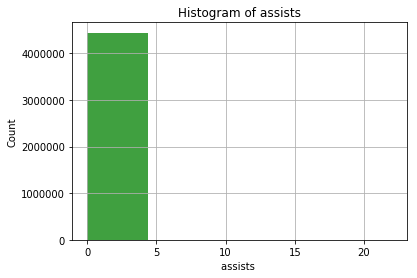

In [16]:
plt.hist(data.assists,bins=5,alpha=0.75,color='green')
plt.xlabel('assists ')
plt.ylabel('Count')
plt.title('Histogram of assists')
plt.grid(True)
plt.show()

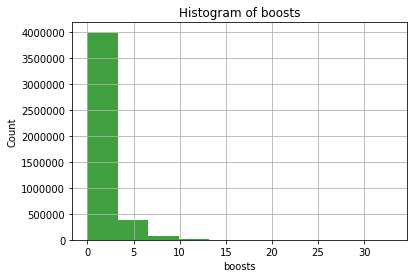

In [17]:
plt.hist(data.boosts ,bins=10,alpha=0.75,color='green')
plt.xlabel('boosts')
plt.ylabel('Count')
plt.title('Histogram of boosts')
plt.grid(True)
plt.show()

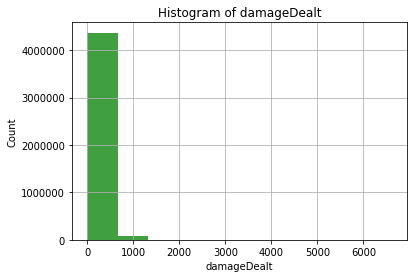

In [18]:
plt.hist(data.damageDealt,bins=10,alpha=0.75,color='green')
plt.xlabel('damageDealt')
plt.ylabel('Count')
plt.title('Histogram of damageDealt')
plt.grid(True)
plt.show()

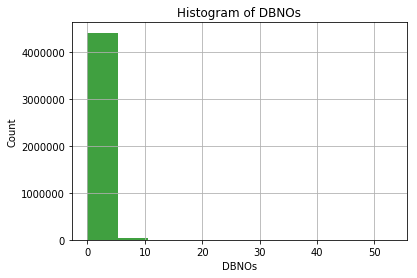

In [19]:
plt.hist(data.DBNOs,bins=10,alpha=0.75,color='green')
plt.xlabel('DBNOs')
plt.ylabel('Count')
plt.title('Histogram of DBNOs')
plt.grid(True)
plt.show()

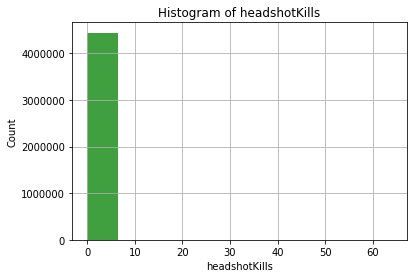

In [20]:
plt.hist(data.headshotKills,bins=10,alpha=0.75,color='green')
plt.xlabel('headshotKills')
plt.ylabel('Count')
plt.title('Histogram of headshotKills')
plt.grid(True)
plt.show()

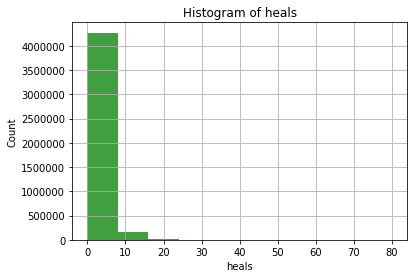

In [21]:
plt.hist(data.heals,bins=10,alpha=0.75,color='green')
plt.xlabel('heals')
plt.ylabel('Count')
plt.title('Histogram of heals')
plt.grid(True)
plt.show()

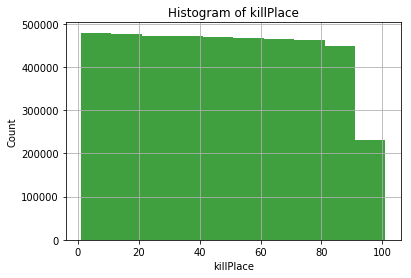

In [22]:
plt.hist(data.killPlace,bins=10,alpha=0.75,color='green')
plt.xlabel('killPlace')
plt.ylabel('Count')
plt.title('Histogram of killPlace')
plt.grid(True)
plt.show()

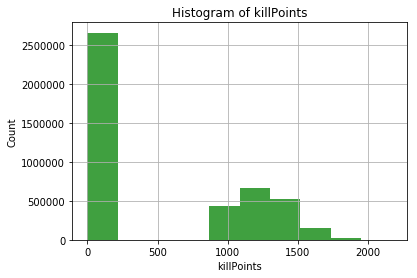

In [23]:
plt.hist(data.killPoints,bins=10,alpha=0.75,color='green')
plt.xlabel('killPoints')
plt.ylabel('Count')
plt.title('Histogram of killPoints')
plt.grid(True)
plt.show()

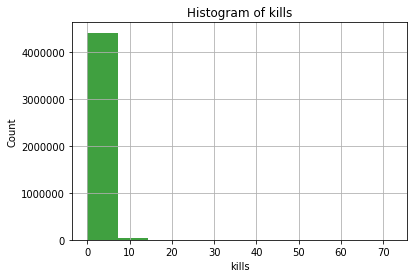

In [24]:
plt.hist(data.kills,bins=10,alpha=0.75,color='green')
plt.xlabel('kills')
plt.ylabel('Count')
plt.title('Histogram of kills')
plt.grid(True)
plt.show()

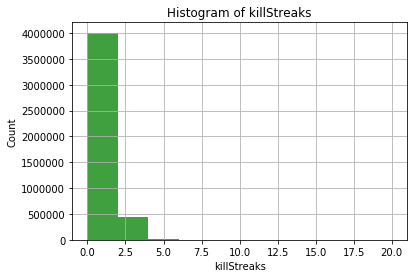

In [25]:
plt.hist(data.killStreaks,bins=10,alpha=0.75,color='green')
plt.xlabel('killStreaks')
plt.ylabel('Count')
plt.title('Histogram of killStreaks')
plt.grid(True)
plt.show()

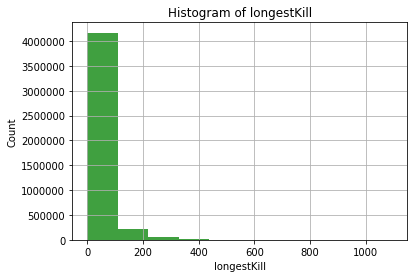

In [26]:
plt.hist(data.longestKill,bins=10,alpha=0.75,color='green')
plt.xlabel('longestKill')
plt.ylabel('Count')
plt.title('Histogram of longestKill')
plt.grid(True)
plt.show()

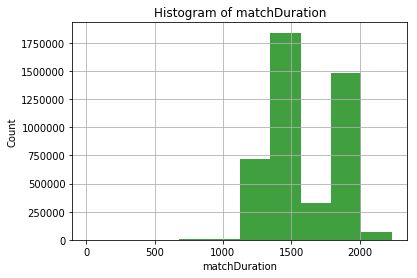

In [27]:
plt.hist(data.matchDuration,bins=10,alpha=0.75,color='green')
plt.xlabel('matchDuration')
plt.ylabel('Count')
plt.title('Histogram of matchDuration')
plt.grid(True)
plt.show()

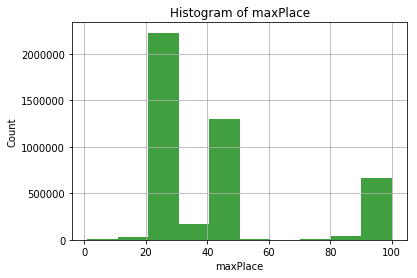

In [28]:
plt.hist(data.maxPlace,bins=10,alpha=0.75,color='green')
plt.xlabel('maxPlace')
plt.ylabel('Count')
plt.title('Histogram of maxPlace')
plt.grid(True)
plt.show()

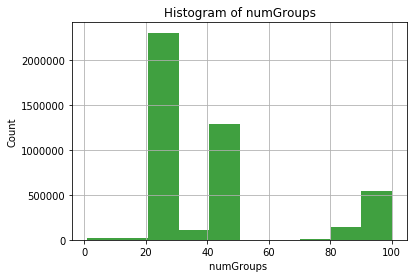

In [29]:
plt.hist(data.numGroups ,bins=10,alpha=0.75,color='green')
plt.xlabel('numGroups ')
plt.ylabel('Count')
plt.title('Histogram of numGroups')
plt.grid(True)
plt.show()

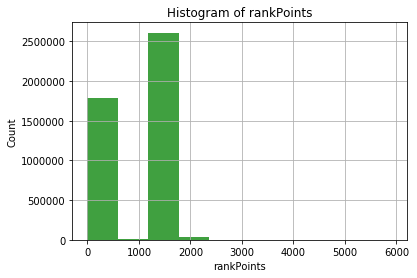

In [30]:
plt.hist(data.rankPoints,bins=10,alpha=0.75,color='green')
plt.xlabel('rankPoints')
plt.ylabel('Count')
plt.title('Histogram of rankPoints')
plt.grid(True)
plt.show()

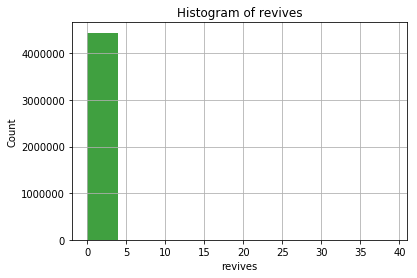

In [31]:
plt.hist(data.revives ,bins=10,alpha=0.75,color='green')
plt.xlabel('revives')
plt.ylabel('Count')
plt.title('Histogram of revives')
plt.grid(True)
plt.show()

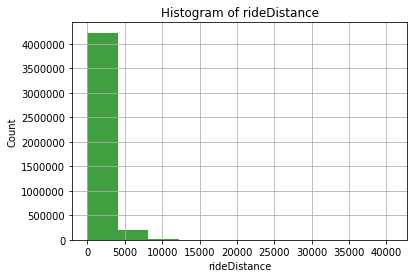

In [32]:
plt.hist(data.rideDistance,bins=10,alpha=0.75,color='green')
plt.xlabel('rideDistance')
plt.ylabel('Count')
plt.title('Histogram of rideDistance')
plt.grid(True)
plt.show()

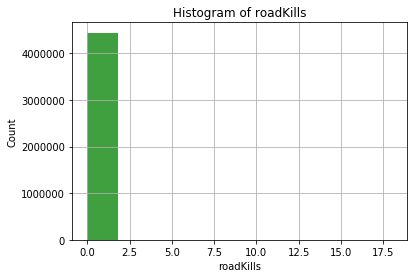

In [33]:
plt.hist(data.roadKills,bins=10,alpha=0.75,color='green')
plt.xlabel('roadKills')
plt.ylabel('Count')
plt.title('Histogram of roadKills')
plt.grid(True)
plt.show()

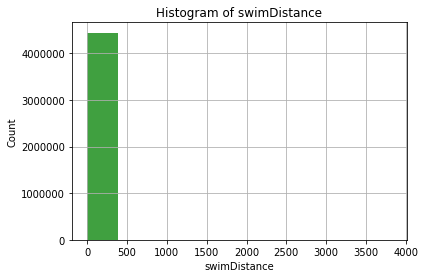

In [34]:
plt.hist(data.swimDistance,bins=10,alpha=0.75,color='green')
plt.xlabel('swimDistance')
plt.ylabel('Count')
plt.title('Histogram of swimDistance')
plt.grid(True)
plt.show()

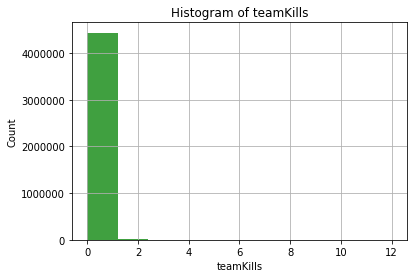

In [35]:
plt.hist(data.teamKills,bins=10,alpha=0.75,color='green')
plt.xlabel('teamKills')
plt.ylabel('Count')
plt.title('Histogram of teamKills')
plt.grid(True)
plt.show()

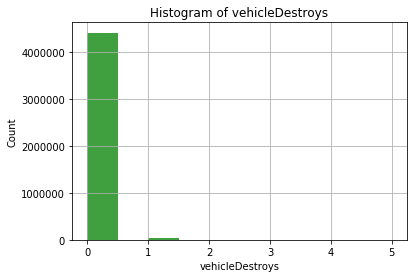

In [36]:
plt.hist(data.vehicleDestroys,bins=10,alpha=0.75,color='green')
plt.xlabel('vehicleDestroys')
plt.ylabel('Count')
plt.title('Histogram of vehicleDestroys')
plt.grid(True)
plt.show()

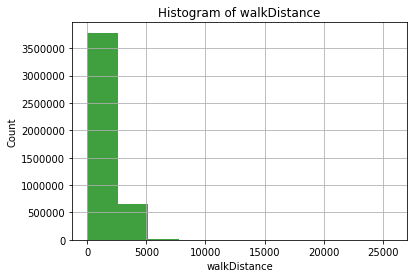

In [37]:
plt.hist(data.walkDistance,bins=10,alpha=0.75,color='green')
plt.xlabel('walkDistance')
plt.ylabel('Count')
plt.title('Histogram of walkDistance')
plt.grid(True)
plt.show()

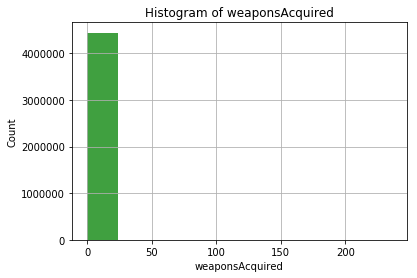

In [38]:
plt.hist(data.weaponsAcquired,bins=10,alpha=0.75,color='green')
plt.xlabel('weaponsAcquired')
plt.ylabel('Count')
plt.title('Histogram of weaponsAcquired')
plt.grid(True)
plt.show()

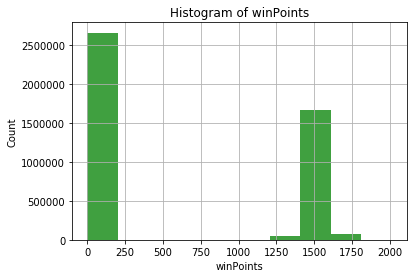

In [39]:
plt.hist(data.winPoints,bins=10,alpha=0.75,color='green')
plt.xlabel('winPoints')
plt.ylabel('Count')
plt.title('Histogram of winPoints')
plt.grid(True)
plt.show()

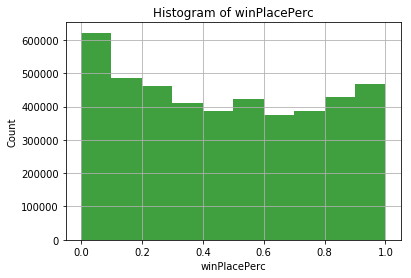

In [40]:
plt.hist(data.winPlacePerc,bins=10,alpha=0.75,color='green')
plt.xlabel('winPlacePerc')
plt.ylabel('Count')
plt.title('Histogram of winPlacePerc')
plt.grid(True)
plt.show()

In [41]:
#get correlation matrix of numerical atrributes
corr = data.corr()

In [42]:
import numpy as np
names = []
for i in data.columns:
    names.append(i)
print names,np.arange(len(names))

['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc'] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


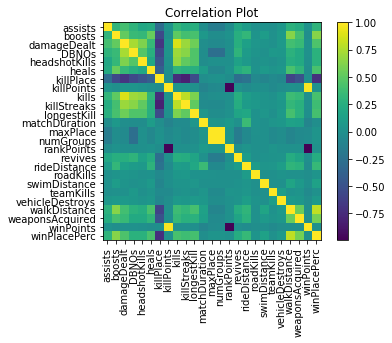

In [43]:
fig,ax=plt.subplots()
d = ax.imshow(corr)
plt.colorbar(d)
ax.set_title("Correlation Plot")
ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(len(names)))
ax.set_xticklabels(names)
ax.set_yticklabels(names)
#rotate x tick lables
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

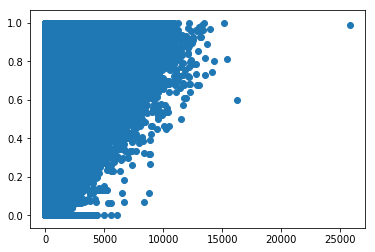

In [44]:
plt.scatter(data.walkDistance,data.winPlacePerc)
plt.show()

In [45]:
##split the data into trainning and test sets
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

C:\Users\Yanhong Simokat\Ananconda27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
y = data['winPlacePerc']

In [47]:
x = data

In [48]:
x = x.drop('winPlacePerc',axis=1)

In [49]:
import numpy as np
x = np.array(x)
y = np.array(y).reshape(-1,1)

In [50]:
x

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 2.448e+02, 1.000e+00,
        1.466e+03],
       [0.000e+00, 0.000e+00, 9.147e+01, ..., 1.434e+03, 5.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 6.800e+01, ..., 1.618e+02, 2.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 5.906e+01, ..., 7.887e+02, 4.000e+00,
        0.000e+00],
       [0.000e+00, 4.000e+00, 1.804e+02, ..., 2.748e+03, 8.000e+00,
        0.000e+00],
       [0.000e+00, 2.000e+00, 2.680e+02, ..., 1.244e+03, 5.000e+00,
        0.000e+00]])

In [51]:
y

array([[0.4444],
       [0.64  ],
       [0.7755],
       ...,
       [0.4815],
       [0.8   ],
       [0.5464]])

In [52]:
#Normalization
#each feature is scaled to [0,1] range
min_max_scaler = preprocessing.MinMaxScaler()
x_norm = min_max_scaler.fit_transform(x)
x_norm

array([[0.        , 0.        , 0.        , ..., 0.00949573, 0.00423729,
        0.72826627],
       [0.        , 0.        , 0.01382557, ..., 0.05562452, 0.02118644,
        0.        ],
       [0.04545455, 0.        , 0.01027811, ..., 0.00627618, 0.00847458,
        0.        ],
       ...,
       [0.        , 0.        , 0.00892684, ..., 0.03059348, 0.01694915,
        0.        ],
       [0.        , 0.12121212, 0.02726723, ..., 0.10659426, 0.03389831,
        0.        ],
       [0.        , 0.06060606, 0.04050786, ..., 0.04825446, 0.02118644,
        0.        ]])

In [53]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)

In [54]:
y_norm = min_max_scaler.fit_transform(y)
y_norm

array([[0.44],
       [0.64],
       [0.78],
       ...,
       [0.48],
       [0.8 ],
       [0.55]])

In [55]:
#Standard linear regression

In [56]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor
from numpy import *
import numpy as np

In [57]:
#assume x0=1 to account for a constant offset
#in order to do multiple regression we need to add a column of 1
x_norm = np.array([np.concatenate((i,[1])) for i in x_norm])

In [58]:
def standRegres(xArr,yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
    xTx = xMat.T*xMat
    #if det(A)=0 then A is not invertible. A is linearly dependent
    if linalg.det(xTx) == 0.0:
        print "This matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [59]:
#standard linear regression weights/estimated beta
weight = standRegres(x_norm,y_norm.T)

In [60]:
#convert array to matrix
xmat=np.mat(x_norm)
ymat=np.mat(y_norm.T)
#predicted y
yHat=xmat*weight

In [61]:
#transform yHat
yHat_T=yHat.T

In [62]:
#compute RMSE
error=abs(yHat_T-ymat)
t_err=np.dot(error, error.T)
rmse_train=np.sqrt(t_err/len(yHat))
print rmse_train

[[0.13]]


In [63]:
#correlation coefficient (also call correlation)
corrcoef(yHat_T,ymat)

array([[1.  , 0.91],
       [0.91, 1.  ]])

In [64]:
from sklearn.cross_validation import KFold

# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x_norm,y_norm)

kf = KFold(len(x_norm), n_folds=10)
x_err = 0
for train,test in kf:
    linreg.fit(x_norm[train],y_norm[train])
    p = linreg.predict(x_norm[test])  #compute rmse on training data
    e = p-y_norm[test]
    x_err += np.dot(e.T,e)
    
rmse_10cv = np.sqrt(x_err/len(x_norm))

In [65]:
#RMSE
print('RMSE on training: %.7f' %rmse_train)
print('RMSE on 10-fold CV: %.7f' %rmse_10cv)

RMSE on training: 0.1265448
RMSE on 10-fold CV: 0.1265467


In [66]:
#Linear Regression

In [67]:
import warnings
warnings.filterwarnings('ignore')

Optimal percentile of features:[96] 

Optimal number of features:24 



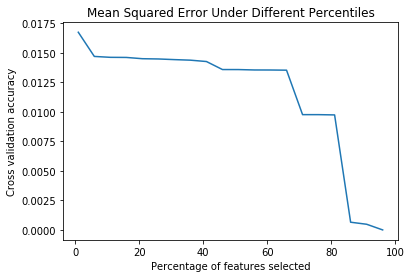

In [68]:
from sklearn import cross_validation,feature_selection
from sklearn.cross_validation import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_norm,y_norm,test_size=0.2,random_state=33)

percentiles = range(1,100,5)
results=[]
for i in range(1,100,5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    x_train_fs = fs.fit_transform(x_train, y_train)
    scores = abs(cross_validation.cross_val_score(linreg, x_train_fs, x_train, scoring='mean_squared_error', cv=5))
    results=np.append(results, scores.mean())

optimal_percentil = np.where(results == results.min())[0]
percentiles1 = np.array(percentiles)
print "Optimal percentile of features:{}".format(percentiles1[optimal_percentil]), "\n"
optimal_num_features = int(floor(percentiles1[optimal_percentil]*len(data.columns)/100))
print "Optimal number of features:{}".format(optimal_num_features), "\n"


# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.title("Mean Squared Error Under Different Percentiles")
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

In [69]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=96)
x_train_fs = fs.fit_transform(x_train, y_train)
for i in range(len(data.columns.values)):
    if fs.get_support()[i]:
        print data.columns.values[i],'\t\t', fs.scores_[i]

assists 		350988.97171419184
boosts 		2394474.6669777413
damageDealt 		856238.3437503367
DBNOs 		303011.3785590185
headshotKills 		297697.6246149418
heals 		797681.5989611308
killPlace 		3810320.089903965
killPoints 		565.394313659026
kills 		760684.3354217985
killStreaks 		591029.0356479635
longestKill 		719263.8251636573
matchDuration 		104.86300584326052
maxPlace 		4910.246784211894
numGroups 		5519.686817000745
rankPoints 		679.7499497676152
revives 		219031.10223314434
rideDistance 		474059.0009790368
roadKills 		4310.408058075872
swimDistance 		81761.18267932523
teamKills 		869.7840363081909
vehicleDestroys 		19276.39114732492
walkDistance 		6832086.438350565
weaponsAcquired 		1832573.6828884913
winPoints 		162.37603317827623


In [70]:
# Calculating Mean absolute Error on the testing using 24 informatic features :
from sklearn.metrics import mean_squared_error

fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=96)
x_train_fs = fs.fit_transform(x_train, y_train)
linreg = LinearRegression()
linreg.fit(x_train_fs, y_train)
x_test_fs = fs.transform(x_test)
lr_pred = linreg.predict(x_test_fs)
lr_mae = mean_squared_error(y_test, lr_pred)

print ('Mean Squared Error (MSE) of the testing data is %0.8f' % lr_mae)
print ('Root Mean Squared Error (RMSE) of the testing data is %0.8f' % math.sqrt(lr_mae))

Mean Squared Error (MSE) of the testing data is 0.01597274
Root Mean Squared Error (RMSE) of the testing data is 0.12638330


In [71]:
#Ridge regression and lasso regression

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y_norm,test_size=0.2,random_state=33)

In [73]:
#alpha values
alpha = np.linspace(0.01, 200, 200)
alpha = np.array([float(e) for e in alpha])
#Ridge and Lasso from sklean
ridge = Ridge()
lasso = Lasso()

In [74]:
def calc_params(X, y, param_name, param_values, model, name, K=5):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        # set classifier parameters
        model.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding MAE scores on train and test sets
            model.fit([X[k] for k in train], y[train])
            train_predict = model.predict(X[train])
            test_predict = model.predict(X[test])
            
            k_train_scores = mean_squared_error(y[train], train_predict)
            k_test_scores = mean_squared_error(y[test], test_predict)
            
            train_scores[i] = np.mean(k_train_scores)
            test_scores[i] = np.mean(k_test_scores)
    
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='red')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='green')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean Cross Validation Error")
    plt.title(name)

    # return the training and testing scores on each parameter value
    min_err_idx = np.where(test_scores == test_scores.min())
    min_err_alpha = param_values[min_err_idx]
    print 'The minimum Mean Squared Error (MSE) is: {:.5f} with {}: {:.5f}'.format(test_scores[min_err_idx][0],param_name, min_err_alpha[0])

The minimum Mean Squared Error (MSE) is: 0.01597 with alpha: 0.01000


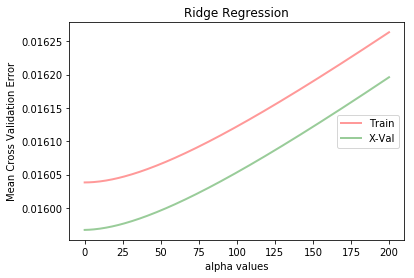

In [75]:
#Ridge Regression
calc_params(x_train, y_train, "alpha", alpha, ridge, "Ridge Regression")

In [76]:
ridge = Ridge(fit_intercept=True, alpha=0.01000)
ridge.fit(x_train, y_train)    
p = ridge.predict(x_test)
MSE = mean_squared_error(y_test, p)

print 'RMSE on test data: {:.8f} using apha = 0.01000'.format(math.sqrt(MSE))

RMSE on test data: 0.12638330 using apha = 0.01000


The minimum Mean Squared Error (MSE) is: 0.04696 with alpha: 0.01000


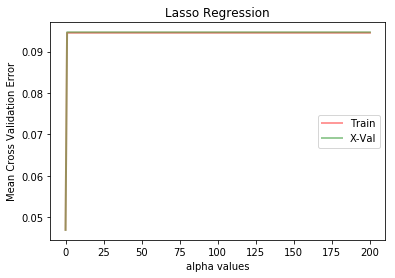

In [77]:
#Lasso Regression
calc_params(x_train, y_train, "alpha", alpha, lasso, "Lasso Regression")

In [78]:
lasso = Lasso(fit_intercept=True, alpha=0.01000)
lasso.fit(x_train, y_train)    
pred = lasso.predict(x_test)
MSE = mean_squared_error(y_test, pred)
               
print 'RMSE on test data: {:.8f} using apha = 0.01000'.format(math.sqrt(MSE))

RMSE on test data: 0.21646841 using apha = 0.01000


In [79]:
#K-means clustering

In [80]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(data)
data_norm

array([[0.  , 0.  , 0.  , ..., 0.  , 0.73, 0.44],
       [0.  , 0.  , 0.01, ..., 0.02, 0.  , 0.64],
       [0.05, 0.  , 0.01, ..., 0.01, 0.  , 0.78],
       ...,
       [0.  , 0.  , 0.01, ..., 0.02, 0.  , 0.48],
       [0.  , 0.12, 0.03, ..., 0.03, 0.  , 0.8 ],
       [0.  , 0.06, 0.04, ..., 0.02, 0.  , 0.55]])

In [81]:
from sklearn.cluster import KMeans

In [82]:
data_norm[0:-1],data_norm[-1],len(data_norm)

(array([[0.  , 0.  , 0.  , ..., 0.  , 0.73, 0.44],
        [0.  , 0.  , 0.01, ..., 0.02, 0.  , 0.64],
        [0.05, 0.  , 0.01, ..., 0.01, 0.  , 0.78],
        ...,
        [0.  , 0.03, 0.01, ..., 0.03, 0.  , 0.29],
        [0.  , 0.  , 0.01, ..., 0.02, 0.  , 0.48],
        [0.  , 0.12, 0.03, ..., 0.03, 0.  , 0.8 ]]),
 array([0.  , 0.06, 0.04, 0.  , 0.  , 0.01, 0.17, 0.  , 0.03, 0.05, 0.07, 0.79,
        0.98, 0.94, 0.27, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.05, 0.02, 0.  ,
        0.55]),
 4446966)

In [83]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_norm)
    Sum_of_squared_distances.append(km.inertia_)

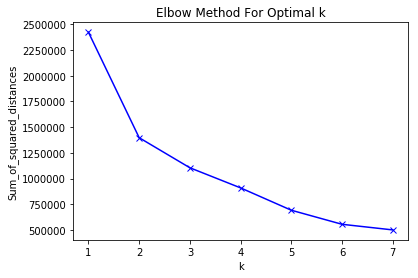

In [84]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [85]:
#perform PCA for demension deduction, then perform kmeans again
from sklearn import decomposition
pca = decomposition.PCA(n_components=7)
data_trans = pca.fit_transform(data_norm)
r = pca.explained_variance_ratio_

In [86]:
r,sum(r)

(array([0.43, 0.28, 0.21, 0.04, 0.03, 0.  , 0.  ]), 0.9885459852399351)

In [87]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_trans)
    Sum_of_squared_distances.append(km.inertia_)

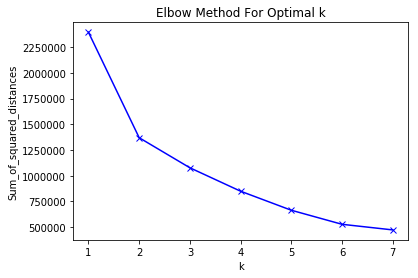

In [88]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [89]:
#h2o
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-win64) (build 25.121-b15, mixed mode)
  Starting server from C:\Users\Yanhong Simokat\Ananconda27\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: c:\users\yanhon~1\appdata\local\temp\tmpj20s_n
  JVM stdout: c:\users\yanhon~1\appdata\local\temp\tmpj20s_n\h2o_Yanhong_Simokat_started_from_python.out
  JVM stderr: c:\users\yanhon~1\appdata\local\temp\tmpj20s_n\h2o_Yanhong_Simokat_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_Yanhong_Simokat_o0vt8s
H2O cluster total nodes:,1
H2O cluster free memory:,7.094 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [90]:
#import data into h2o
df = h2o.import_file("train_V2.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [91]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
gaussian_fit = H2OGeneralizedLinearEstimator(family="gaussian") 
gaussian_fit.train(y = 'winPlacePerc',x = ['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills','killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance','roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','winPoints'],training_frame=df)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [92]:
gaussian_fit

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1542740085689_1


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.0165906696476
RMSE: 0.128804773388
MAE: 0.0946211569829
RMSLE: NaN
R^2: 0.824433273354
Mean Residual Deviance: 0.0165906696476
Null degrees of freedom: 4446964
Residual degrees of freedom: 4446942
Null deviance: 420228.414911
Residual deviance: 73778.1272496
AIC: -5607742.71414
Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-11-20 12:54:54,0.000 sec,0,420228.4159540,0.0944978


In [93]:
from h2o.estimators.kmeans import H2OKMeansEstimator
cluster_estimator = H2OKMeansEstimator(k=7)
cluster_estimator.train(x=['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills','killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance','roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','winPoints','winPlacePerc'], training_frame=df)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [94]:
cluster_estimator

Model Details
H2OKMeansEstimator :  K-means
Model Key:  KMeans_model_python_1542740085689_2


ModelMetricsClustering: kmeans
** Reported on train data. **

MSE: NaN
RMSE: NaN
Total Within Cluster Sum of Square Error: 69132522.0005
Total Sum of Square Error to Grand Mean: 106727158.093
Between Cluster Sum of Square Error: 37594636.0923
Centroid Statistics: 


,centroid,size,within_cluster_sum_of_squares
,1.0,2863781.0,28727206.0989000
,2.0,192517.0,8025933.4437100
,3.0,1221311.0,25484420.9110000
,4.0,35931.0,1702916.7143500
,5.0,87906.0,2087134.6037500
,6.0,32598.0,1587337.0597100
,7.0,12922.0,1517573.1690500


Scoring History: 


,timestamp,duration,iterations,number_of_reassigned_observations,within_cluster_sum_of_squares
,2018-11-20 12:54:58,0.006 sec,0.0,nan,nan
,2018-11-20 12:55:12,14.639 sec,1.0,4446966.0,132843391.2090000
,2018-11-20 12:55:14,16.015 sec,2.0,124070.0,88899192.4331000
,2018-11-20 12:55:15,17.061 sec,3.0,156173.0,82348814.7551000
,2018-11-20 12:55:16,18.064 sec,4.0,228973.0,77674000.2322000
,2018-11-20 12:55:17,19.119 sec,5.0,237155.0,74590938.9486000
,2018-11-20 12:55:18,20.144 sec,6.0,208714.0,72694021.2838000
,2018-11-20 12:55:19,21.133 sec,7.0,178722.0,71453228.0082000
,2018-11-20 12:55:20,22.149 sec,8.0,157907.0,70565939.6878000
,2018-11-20 12:55:21,23.187 sec,9.0,144935.0,69924978.5101000


In [95]:
from h2o.transforms.decomposition import H2OPCA
pca_decomp = H2OPCA(k=7, transform="NONE", pca_method="Power")
pca_decomp.train(x=['assists','boosts','damageDealt','DBNOs','headshotKills','heals','killPlace','killPoints','kills','killStreaks','longestKill','matchDuration','maxPlace','numGroups','rankPoints','revives','rideDistance','roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','winPoints'], training_frame=df)

pca Model Build progress: |███████████████████████████████████████████████| 100%


In [96]:
pca_decomp

Model Details
H2OPCA :  Principal Components Analysis
Model Key:  PCA_model_python_1542740085689_3


ModelMetricsPCA: pca
** Reported on train data. **

MSE: NaN
RMSE: NaN
Scoring History from Power SVD: 


,timestamp,duration,iterations,err,principal_component_
,2018-11-20 12:55:25,0.999 sec,0.0,946556.1974180,1.0
,2018-11-20 12:55:25,0.999 sec,1.0,2565279.2157200,1.0
,2018-11-20 12:55:25,0.999 sec,2.0,1165683.9701500,1.0
,2018-11-20 12:55:25,0.999 sec,3.0,271859.1120810,1.0
,2018-11-20 12:55:25,0.999 sec,4.0,60545.1373298,1.0
---,---,---,---,---,---
,2018-11-20 12:55:37,12.888 sec,235.0,0.0001726,7.0
,2018-11-20 12:55:37,12.888 sec,236.0,0.0001221,7.0
,2018-11-20 12:55:37,12.888 sec,237.0,0.0001495,7.0
,2018-11-20 12:55:37,12.888 sec,238.0,0.0001726,7.0



See the whole table with table.as_data_frame()


In [97]:
h2o.shutdown()

[WARNING] in <ipython-input-97-1edf85295eae> line 1:
    >>> h2o.shutdown()
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_9c58 closed.
